# Wstępna analiza danych

## Import bibliotek

In [1]:
import pandas as pd
import os
import warnings
from plotnine import *

warnings.filterwarnings('ignore')

## Odczyt plików

Odczytanie pliku z uporządkowanymi szeregami czasowymi

In [2]:
time_series_udf_dataset = pd.read_csv("../Organised/Time_series_udf_dataset.csv")

Odczytanie plików wszystkich węzłów dla jednego ekspermentu

In [3]:
node1 = pd.read_csv("../Prepared/aggregation/avgNetProfitGroupedBySoldDate/CPU-data-vol-1GB-5nodes/source-data/node-11/07_08_2021_23_43_34.csv")
node1['node'] = 1
node2 = pd.read_csv("../Prepared/aggregation/avgNetProfitGroupedBySoldDate/CPU-data-vol-1GB-5nodes/source-data/node-12/07_08_2021_23_46_44.csv")
node2['node'] = 2
node3 = pd.read_csv("../Prepared/aggregation/avgNetProfitGroupedBySoldDate/CPU-data-vol-1GB-5nodes/source-data/node-13/07_08_2021_23_43_33.csv")
node3['node'] = 3
node4 = pd.read_csv("../Prepared/aggregation/avgNetProfitGroupedBySoldDate/CPU-data-vol-1GB-5nodes/source-data/node-14/07_08_2021_23_45_13.csv")
node4['node'] = 4
node5 = pd.read_csv("../Prepared/aggregation/avgNetProfitGroupedBySoldDate/CPU-data-vol-1GB-5nodes/source-data/node-15/07_08_2021_23_55_41.csv")
node5['node'] = 5
node6 = pd.read_csv("../Prepared/aggregation/avgNetProfitGroupedBySoldDate/CPU-data-vol-1GB-5nodes/source-data/node-20/07_08_2021_23_43_43.csv")
node6['node'] = 6

## Wykresy dla przykładowego eksperymentu

Przebieg zużycia RAM dla jednego eksperymentu z podziałem na węzły

In [23]:
path = "../plots/initial_analysis/"
if not os.path.exists(path):
  os.makedirs(path)


nodes = pd.concat([node1, node2, node3, node4, node5, node6])

p = (ggplot(nodes, aes(x='epoch', y = "RAM"))
    + geom_line(color = "orange")
    + facet_wrap('node', ncol=2)
    + labs(title=f"Przebieg zużycia RAM", y="Zużycie ram (%)", x = "Czas (s)")
  )

ggsave(plot=p, filename=f"{path}nodes_ram.pdf", dpi=1000)

Przebieg zużycia CPU dla jednego eksperymentu z podziałem na węzły

In [24]:
nodes = pd.concat([node1, node2, node3, node4, node5, node6])
p = (ggplot(nodes)
    + aes(x='epoch', y = "CPU")
    + geom_line(size=0.5, color = "red")
    + facet_wrap('node', ncol=2)
    + labs(title=f"Przebieg zużycia CPU", y="Zużycie procesora (%)", x = "Czas (s)")
  )
ggsave(plot=p, filename=f"{path}nodes_cpu.pdf", dpi=1000)


## Analiza dla agregacji

Długość szeregu dla poszczególnych eksperymentów

In [40]:
joined_aggregation_all = time_series_udf_dataset[time_series_udf_dataset["label"]=="aggregation"]

In [41]:
aggregation_snapshot_plot = (ggplot(joined_aggregation_all, aes(x='snapshot'))
  + geom_histogram(size=0.5, binwidth=1.0)
  + labs(title=f"Agregacja - długość szeregu/eksperyment", y="Długość szeregu", x = "Eksperyment")
)
ggsave(plot=aggregation_snapshot_plot, filename=f"{path}aggregation_count_per_snapshot.pdf", dpi=1000)

Maksymalne wartości CPU i RAM dla poszczególnych eksperymentów

In [42]:
joined_aggregation_by_snapshots_max = joined_aggregation_all.groupby('snapshot')[['snapshot', 'CPU', 'RAM']].max()
aggregation_snapshot_max_plot = (ggplot(joined_aggregation_by_snapshots_max, aes(x='snapshot', y='CPU'))
  + geom_line(size=0.5, color='red')
  + labs(y="CPU", x = "Eksperyment")
)
ggsave(plot=aggregation_snapshot_max_plot, filename=f"{path}aggregation_max_cpu.png", dpi=1000)
aggregation_snapshot_max_plot = (ggplot(joined_aggregation_by_snapshots_max, aes(x='snapshot', y='RAM'))
  + geom_line(size=0.5, color='orange')
  + labs(y="RAM", x = "Eksperyment")
)
ggsave(plot=aggregation_snapshot_max_plot, filename=f"{path}aggregation_max_ram.pdf", dpi=1000)

Średnie wartości CPU i RAM dla poszczególnych eksperymentów

In [43]:
joined_aggregation_by_snapshots_mean = joined_aggregation_all.groupby('snapshot')[['snapshot', 'CPU', 'RAM']].mean()
aggregation_snapshot_mean_plot = (ggplot(joined_aggregation_by_snapshots_mean, aes(x='snapshot', y='CPU'))
  + geom_line(size=0.5, color='red')
  + labs(y="CPU", x = "Eksperyment")
)
ggsave(plot=aggregation_snapshot_mean_plot, filename=f"{path}aggregation_mean_cpu.pdf", dpi=1000)
aggregation_snapshot_mean_plot = (ggplot(joined_aggregation_by_snapshots_mean, aes(x='snapshot', y='RAM'))
  + geom_line(size=0.5, color='orange')
  + labs(y="RAM", x = "Eksperyment")
)
ggsave(plot=aggregation_snapshot_mean_plot, filename=f"{path}aggregation_mean_ram.pdf", dpi=1000)

Maksymalne wartości CPU i RAM dla poszczególnych eksperymentów na jednym wykresie

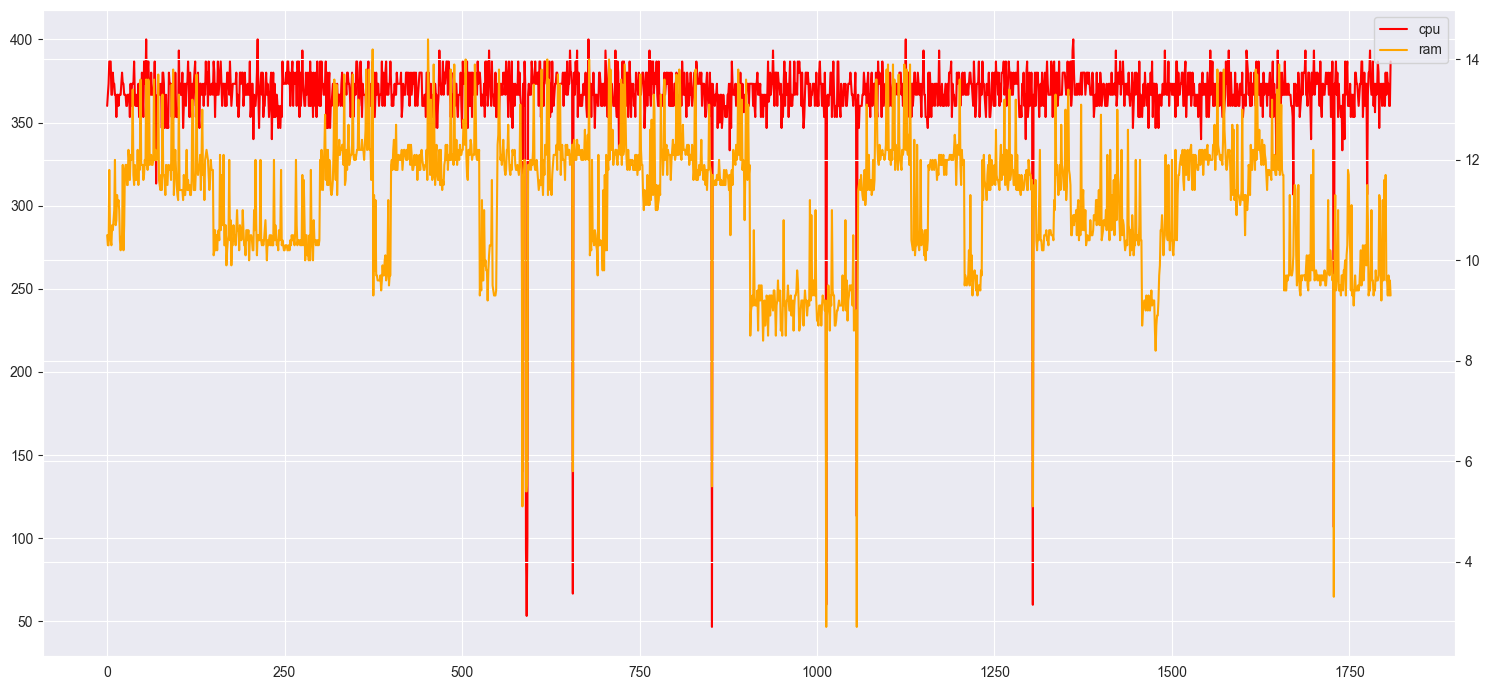

In [44]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [15, 7]
plt.rcParams["figure.autolayout"] = True
cpu = joined_aggregation_by_snapshots_max['CPU']
ram = joined_aggregation_by_snapshots_max['RAM']
ax1 = plt.subplot()
l1, = ax1.plot(cpu, color='red')
ax2 = ax1.twinx()
l2, = ax2.plot(ram, color='orange')
plt.legend([l1, l2], ["cpu", "ram"])
plt.show()

## Analiza poszczególnych typów funkcji dla wszystkich eksperymentów

In [50]:
joined_aggregation_filtration_all = time_series_udf_dataset[time_series_udf_dataset["label"]=="filtration-aggregation"]
joined_filtration_aggregation_join_all = time_series_udf_dataset[time_series_udf_dataset["label"]=="filtration-aggregation-join"]
joined_filtration_join_all = time_series_udf_dataset[time_series_udf_dataset["label"]=="filtration-join"]
joined_filtration_all = time_series_udf_dataset[time_series_udf_dataset["label"]=="filtration"]
all_df = pd.concat([joined_aggregation_all, joined_filtration_all, joined_aggregation_filtration_all, joined_filtration_aggregation_join_all, joined_filtration_join_all])
all_df

,snapshot,label,udf,epoch,CPU,RAM,size
0,0,aggregation,avgNetProfitGroupedBySoldDate,0.000000,206.7,4.8,1
1,0,aggregation,avgNetProfitGroupedBySoldDate,0.156270,220.0,5.0,1
2,0,aggregation,avgNetProfitGroupedBySoldDate,0.314010,133.3,5.2,1
3,0,aggregation,avgNetProfitGroupedBySoldDate,0.471593,146.7,5.3,1
4,0,aggregation,avgNetProfitGroupedBySoldDate,0.628038,126.7,5.4,1
...,...,...,...,...,...,...,...
3250344,599,filtration-join,filterStoreSalesWhereYearAfter2000,36.625042,0.0,5.6,2
3250345,599,filtration-join,filterStoreSalesWhereYearAfter2000,36.780466,0.0,5.6,2
3250346,599,filtration-join,filterStoreSalesWhereYearAfter2000,36.935759,0.0,5.6,2
3250347,599,filtration-join,filterStoreSalesWhereYearAfter2000,37.091189,0.0,5.6,2


Histogram długości szeregów


In [51]:
histogram_snapshot_plot = (ggplot(all_df, aes(x='snapshot'))
  + geom_histogram(size=0.5, binwidth=1.0)
  + facet_wrap('label', ncol=1)
  + labs(title=f"Długość szeregu w kolejnych eksperymentach", y="Długość szeregu", x = "Eksperyment")
)
ggsave(plot=histogram_snapshot_plot, filename=f"{path}all_count.pdf", dpi=1000)

Maksymalne wartości CPU i RAM dla poszczególnych eksperymentów

In [52]:
joined_all_by_snapshots_max = all_df.groupby(['label', 'snapshot'])[['label', 'snapshot', 'CPU', 'RAM']].max()
joined_all_by_snapshots_max = joined_all_by_snapshots_max.reset_index(drop=True)
all_snapshot_max_plot = (ggplot(joined_all_by_snapshots_max, aes(x='snapshot', y='RAM'))
  + geom_line(color='orange')
  + facet_wrap('label', ncol=1)
  + labs(y="RAM", x = "Eksperyment")
)
ggsave(plot=all_snapshot_max_plot, filename=f"{path}all_max_ram.pdf", dpi=1000)

all_snapshot_max_plot = (ggplot(joined_all_by_snapshots_max, aes(x='snapshot', y='CPU'))
  + geom_line(color='red')
  + facet_wrap('label', ncol=1)
  + labs(y="CPU", x = "Eksperyment")
)
ggsave(plot=all_snapshot_max_plot, filename=f"{path}all_max_cpu.pdf", dpi=1000)

Średnie wartości CPU i RAM dla poszczególnych eksperymentów

In [53]:
joined_all_by_snapshots_mean = all_df.groupby(['label', 'snapshot'])[['label', 'snapshot', 'CPU', 'RAM']].mean()
joined_all_by_snapshots_mean = joined_all_by_snapshots_mean.reset_index(level=0)
all_snapshot_mean_plot = (ggplot(joined_all_by_snapshots_mean, aes(x='snapshot', y='RAM'))
  + geom_line(color='orange')
  + facet_wrap('label', ncol=1)
  + labs(y="RAM", x = "Eksperyment")
)
ggsave(plot=all_snapshot_mean_plot, filename=f"{path}all_mean_ram.pdf", dpi=1000)

all_snapshot_mean_plot = (ggplot(joined_all_by_snapshots_mean, aes(x='snapshot', y='CPU'))
  + geom_line(color='red')
  + facet_wrap('label', ncol=1)
  + labs(y="CPU", x = "Eksperyment")
)
ggsave(plot=all_snapshot_mean_plot, filename=f"{path}all_mean_cpu.pdf", dpi=1000)